In [1]:
from sklearn.datasets import make_moons,make_circles, make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.layers import Dense, LeakyReLU
from keras.models import Sequential
from keras.initializers import glorot_normal
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
X,y=make_blobs(n_features=2,n_samples=400,centers=3)

In [3]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
X

array([[ -7.90402453,   0.89129845],
       [  8.97345811,  -6.25108248],
       [  7.34304785,  -8.67233472],
       [ -4.99384738,   1.97852271],
       [  8.33791308,  -4.75147809],
       [  9.06036786,  -7.71291716],
       [ -4.31142205,   2.98699325],
       [  6.70317502,  -6.41120465],
       [ -6.26434869,   0.81600617],
       [ -4.63679849,   2.88221349],
       [  6.86378582,  -5.36934185],
       [ 10.71432924,  -4.1044975 ],
       [  6.47312201,  -5.35873251],
       [  8.34825693,  -4.55174024],
       [  7.80513163,  -6.88742367],
       [  7.80975197,  -8.16147089],
       [ -6.4656863 ,   1.23321818],
       [ 10.05362862,  -9.4495136 ],
       [  9.11747708,  -8.62479988],
       [ -6.09766511,   1.90000899],
       [ -5.2268742 ,   3.33794791],
       [ -5.4220891 ,   2.65546433],
       [  7.1746203 ,  -5.03183665],
       [ 10.01656339,  -9.99085207],
       [  8.35579022,  -7.22813752],
       [  9.14204234,  -5.83672373],
       [  7.4371159 ,  -5.39660807],
 

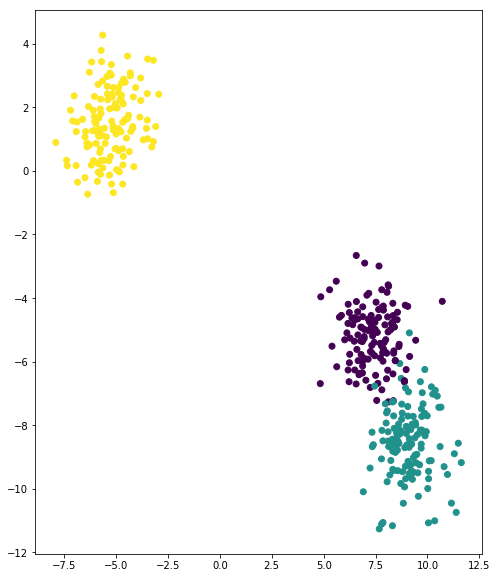

In [4]:
plt.figure(figsize=[8,10])
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
def plot_decision_boundary(prediction_model, X, Y):
    # Plot the decision boundary
    # Determine grid range in x and y directions
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    # Set grid spacing parameter
    spacing = min(x_max - x_min, y_max - y_min) / 100

    # Create grid
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                   np.arange(y_min, y_max, spacing))
    
    # Concatenate data to match input
    data = np.hstack((XX.ravel().reshape(-1,1), 
                      YY.ravel().reshape(-1,1)))
    # Get decision boundary probabilities
    db_prob = prediction_model.predict(data)
    
    # Convert probabilities to classes
    clf = np.where(db_prob<0.5,0,1)
    
    Z = clf.reshape(XX.shape)
    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z[:,:,0], cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=Y, 
                cmap=plt.cm.Spectral)
    plt.show()

In [14]:
plot_decision_boundary(model,X,y)

ValueError: cannot reshape array of size 38178 into shape (101,126)

In [7]:
model=Sequential()
model.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
hist=model.fit(X_train,to_categorical(y_train),epochs=500)

Epoch 1/500
320/320 [==============================] - 1s 2ms/step - loss: 0.6188 - acc: 0.6667
Epoch 2/500
320/320 [==============================] - 0s 42us/step - loss: 0.6013 - acc: 0.6667
Epoch 3/500
320/320 [==============================] - 0s 47us/step - loss: 0.5806 - acc: 0.6667
Epoch 4/500
320/320 [==============================] - 0s 46us/step - loss: 0.5576 - acc: 0.6667
Epoch 5/500
320/320 [==============================] - 0s 46us/step - loss: 0.5368 - acc: 0.6667
Epoch 6/500
320/320 [==============================] - 0s 45us/step - loss: 0.5152 - acc: 0.6844
Epoch 7/500
320/320 [==============================] - 0s 49us/step - loss: 0.4935 - acc: 0.7688
Epoch 8/500
320/320 [==============================] - 0s 42us/step - loss: 0.4712 - acc: 0.7740
Epoch 9/500
320/320 [==============================] - 0s 42us/step - loss: 0.4498 - acc: 0.7740
Epoch 10/500
320/320 [==============================] - 0s 47us/step - loss: 0.4289 - acc: 0.7740
Epoch 11/500
320/320 [========

320/320 [==============================] - 0s 43us/step - loss: 0.1179 - acc: 0.9552
Epoch 85/500
320/320 [==============================] - 0s 49us/step - loss: 0.1154 - acc: 0.9583
Epoch 86/500
320/320 [==============================] - 0s 40us/step - loss: 0.1146 - acc: 0.9646
Epoch 87/500
320/320 [==============================] - 0s 38us/step - loss: 0.1144 - acc: 0.9552
Epoch 88/500
320/320 [==============================] - 0s 42us/step - loss: 0.1135 - acc: 0.9646
Epoch 89/500
320/320 [==============================] - 0s 44us/step - loss: 0.1096 - acc: 0.9646
Epoch 90/500
320/320 [==============================] - 0s 45us/step - loss: 0.1092 - acc: 0.9552
Epoch 91/500
320/320 [==============================] - 0s 40us/step - loss: 0.1091 - acc: 0.9688
Epoch 92/500
320/320 [==============================] - 0s 42us/step - loss: 0.1060 - acc: 0.9625
Epoch 93/500
320/320 [==============================] - 0s 37us/step - loss: 0.1038 - acc: 0.9625
Epoch 94/500
320/320 [===========

320/320 [==============================] - 0s 36us/step - loss: 0.0580 - acc: 0.9792
Epoch 168/500
320/320 [==============================] - 0s 37us/step - loss: 0.0612 - acc: 0.9792
Epoch 169/500
320/320 [==============================] - 0s 39us/step - loss: 0.0606 - acc: 0.9792
Epoch 170/500
320/320 [==============================] - 0s 39us/step - loss: 0.0556 - acc: 0.9771
Epoch 171/500
320/320 [==============================] - 0s 40us/step - loss: 0.0573 - acc: 0.9771
Epoch 172/500
320/320 [==============================] - 0s 35us/step - loss: 0.0560 - acc: 0.9771
Epoch 173/500
320/320 [==============================] - 0s 44us/step - loss: 0.0571 - acc: 0.9771
Epoch 174/500
320/320 [==============================] - 0s 38us/step - loss: 0.0593 - acc: 0.9813
Epoch 175/500
320/320 [==============================] - 0s 37us/step - loss: 0.0597 - acc: 0.9792
Epoch 176/500
320/320 [==============================] - 0s 39us/step - loss: 0.0550 - acc: 0.9771
Epoch 177/500
320/320 [=

320/320 [==============================] - 0s 39us/step - loss: 0.0464 - acc: 0.9792
Epoch 250/500
320/320 [==============================] - 0s 36us/step - loss: 0.0460 - acc: 0.9771
Epoch 251/500
320/320 [==============================] - 0s 40us/step - loss: 0.0477 - acc: 0.9812
Epoch 252/500
320/320 [==============================] - 0s 40us/step - loss: 0.0474 - acc: 0.9792
Epoch 253/500
320/320 [==============================] - 0s 39us/step - loss: 0.0455 - acc: 0.9833
Epoch 254/500
320/320 [==============================] - 0s 41us/step - loss: 0.0469 - acc: 0.9792
Epoch 255/500
320/320 [==============================] - 0s 36us/step - loss: 0.0454 - acc: 0.9792
Epoch 256/500
320/320 [==============================] - 0s 36us/step - loss: 0.0454 - acc: 0.9792
Epoch 257/500
320/320 [==============================] - 0s 40us/step - loss: 0.0453 - acc: 0.9792
Epoch 258/500
320/320 [==============================] - 0s 37us/step - loss: 0.0455 - acc: 0.9833
Epoch 259/500
320/320 [=

320/320 [==============================] - 0s 32us/step - loss: 0.0452 - acc: 0.9792
Epoch 332/500
320/320 [==============================] - 0s 38us/step - loss: 0.0412 - acc: 0.9833
Epoch 333/500
320/320 [==============================] - 0s 37us/step - loss: 0.0429 - acc: 0.9854
Epoch 334/500
320/320 [==============================] - 0s 32us/step - loss: 0.0426 - acc: 0.9854
Epoch 335/500
320/320 [==============================] - 0s 36us/step - loss: 0.0406 - acc: 0.9812
Epoch 336/500
320/320 [==============================] - 0s 36us/step - loss: 0.0434 - acc: 0.9812
Epoch 337/500
320/320 [==============================] - 0s 34us/step - loss: 0.0403 - acc: 0.9833
Epoch 338/500
320/320 [==============================] - 0s 33us/step - loss: 0.0405 - acc: 0.9813
Epoch 339/500
320/320 [==============================] - 0s 42us/step - loss: 0.0403 - acc: 0.9812
Epoch 340/500
320/320 [==============================] - 0s 41us/step - loss: 0.0416 - acc: 0.9854
Epoch 341/500
320/320 [=

320/320 [==============================] - 0s 47us/step - loss: 0.0397 - acc: 0.9833
Epoch 414/500
320/320 [==============================] - 0s 46us/step - loss: 0.0391 - acc: 0.9812
Epoch 415/500
320/320 [==============================] - 0s 49us/step - loss: 0.0394 - acc: 0.9854
Epoch 416/500
320/320 [==============================] - 0s 44us/step - loss: 0.0394 - acc: 0.9854
Epoch 417/500
320/320 [==============================] - 0s 40us/step - loss: 0.0385 - acc: 0.9833
Epoch 418/500
320/320 [==============================] - 0s 42us/step - loss: 0.0382 - acc: 0.9833
Epoch 419/500
320/320 [==============================] - 0s 40us/step - loss: 0.0396 - acc: 0.9833
Epoch 420/500
320/320 [==============================] - 0s 44us/step - loss: 0.0438 - acc: 0.9833
Epoch 421/500
320/320 [==============================] - 0s 43us/step - loss: 0.0386 - acc: 0.9854
Epoch 422/500
320/320 [==============================] - 0s 41us/step - loss: 0.0381 - acc: 0.9833
Epoch 423/500
320/320 [=

320/320 [==============================] - 0s 41us/step - loss: 0.0367 - acc: 0.9875
Epoch 496/500
320/320 [==============================] - 0s 50us/step - loss: 0.0377 - acc: 0.9833
Epoch 497/500
320/320 [==============================] - 0s 43us/step - loss: 0.0373 - acc: 0.9875
Epoch 498/500
320/320 [==============================] - 0s 46us/step - loss: 0.0375 - acc: 0.9833
Epoch 499/500
320/320 [==============================] - 0s 42us/step - loss: 0.0380 - acc: 0.9854
Epoch 500/500
320/320 [==============================] - 0s 35us/step - loss: 0.0366 - acc: 0.9854


In [12]:
plot_decision_boundary(model,X,y)

ValueError: cannot reshape array of size 38178 into shape (151,100,3)

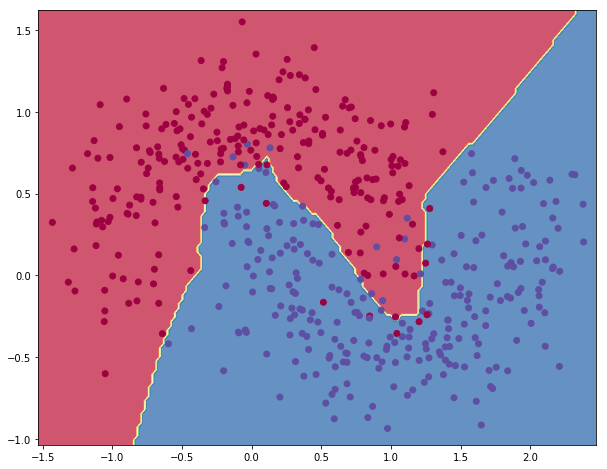

In [207]:
plot_decision_boundary(model,X,y)

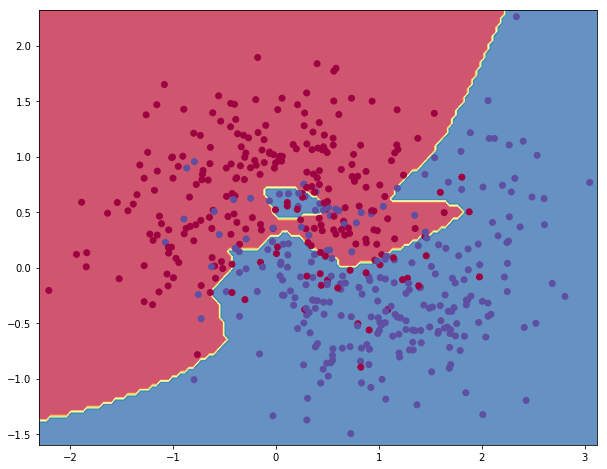

In [183]:
plot_decision_boundary(model,X,y)

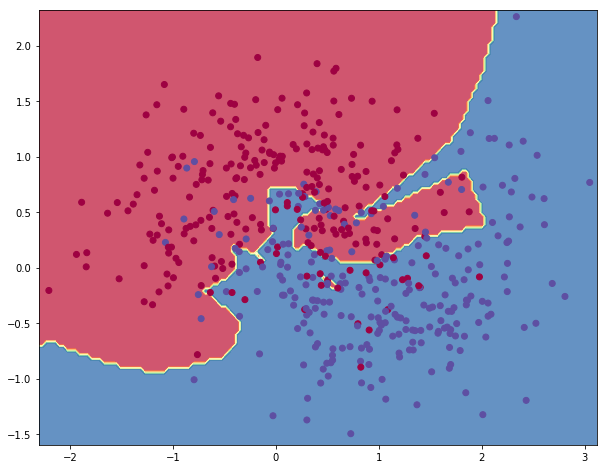

In [173]:
plot_decision_boundary(model,X,y)

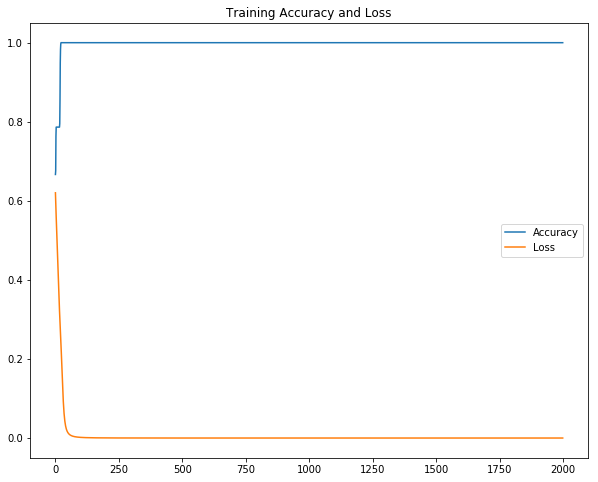

In [289]:
# Fit the model
#hist = model.fit(X_train, y_train, epochs=1000, verbose=0)

plt.figure(figsize=(10,8))
plt.plot(hist.history['acc'], label='Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')
plt.show()

In [18]:
results = model.evaluate(X_test, to_categorical(y_test),
                            batch_size=len(y_test))
print("Test Accuracy: %.3f" %results[1])

80/80 [==============================] - 0s 2ms/step
Test Accuracy: 1.000


In [19]:
results

[0.014112438075244427, 1.0]

In [ ]:
a=np.asarray([[-15,-15]])